In [16]:
import pandas as pd
from Operators.evaluation import *

import warnings
warnings.filterwarnings("ignore")

In this notebook we analysed the outputs that we got from the first gridsearch. The settings for the first gridsearch were as follows:  
<br> param_grid = {
       <br> "POP_SIZE": [100],
       <br>  "mut_prob": [0.1],
        <br> "xo_prob":  [0.9],
       <br>  "mutation": [single_player_swap_2teams, single_player_shift_all_teams, full_position_swap_2teams],
       <br>  "crossover": [crossover_swap_whole_position, crossover_swap_extreme_player],
       <br>  "selection_algorithm": [roulette_selection, tournament_selection],
       <br>  "elitism":[True, False]}

<br> This evaluation let us decide which mutation, crossober and selection_algorithm perform the best. Moreover, we tested if algorithm wokrs better with elitis or without. 

Loading the results from the first gridsearch 

In [17]:
fitness_path = "fitness_logs_gs1"
summary_path = "ga_summary_gs1.csv"

In [18]:
fitness_dfs = load_fitness_logs(fitness_path)

Loaded 24 configurations from 'fitness_logs_gs1'


In [19]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=roulette_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=True', 'POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=False', 'POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_

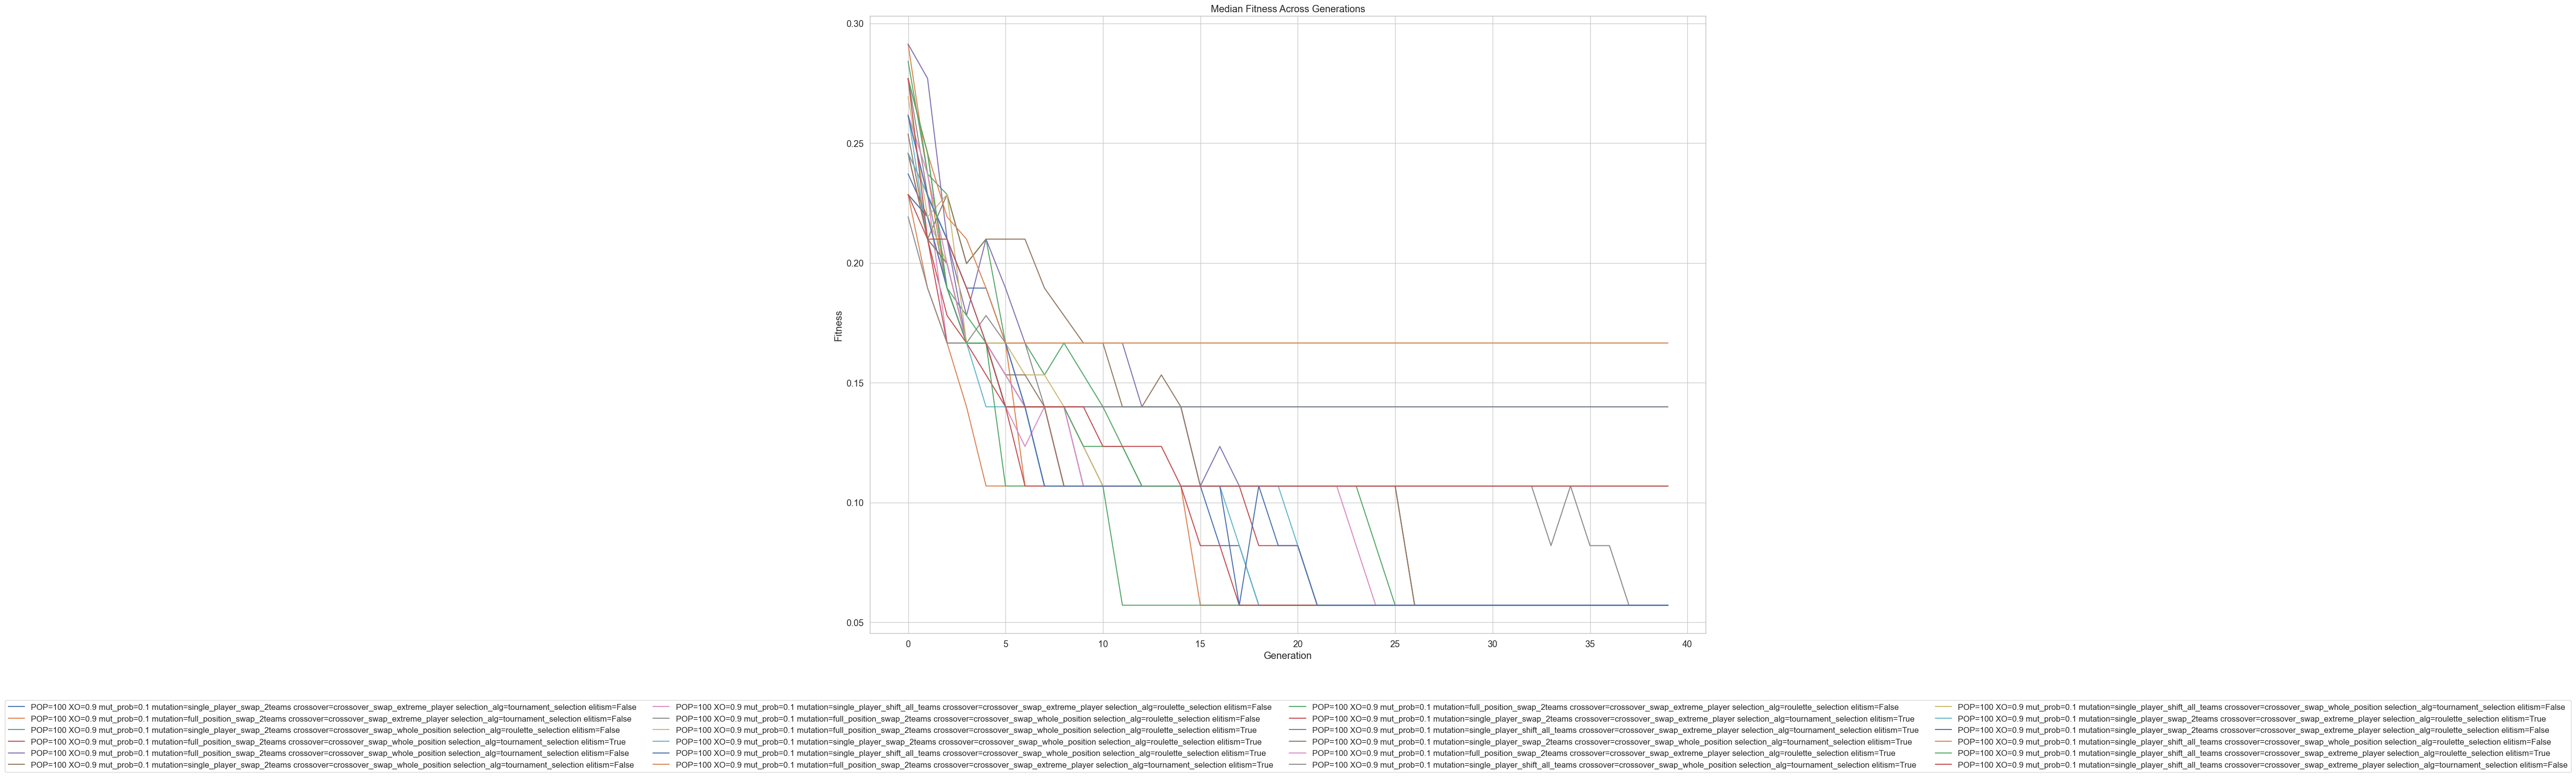

In [20]:
plot_median_fitness_over_gen(fitness_dfs)

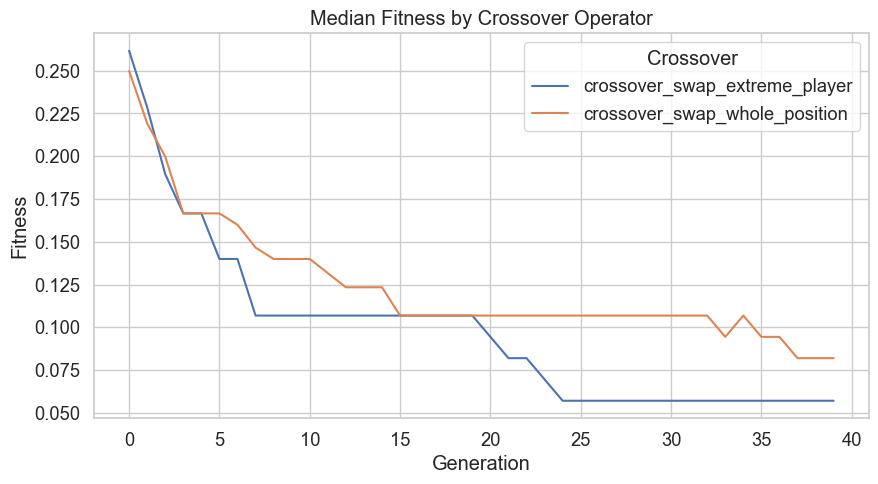

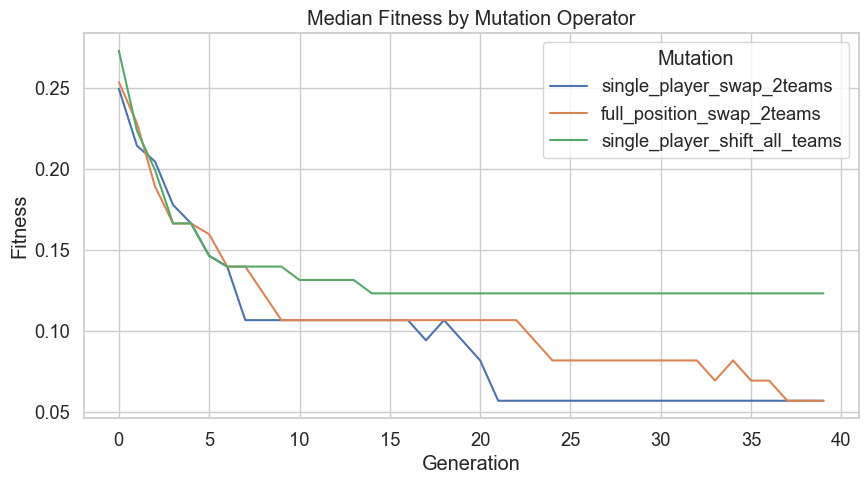

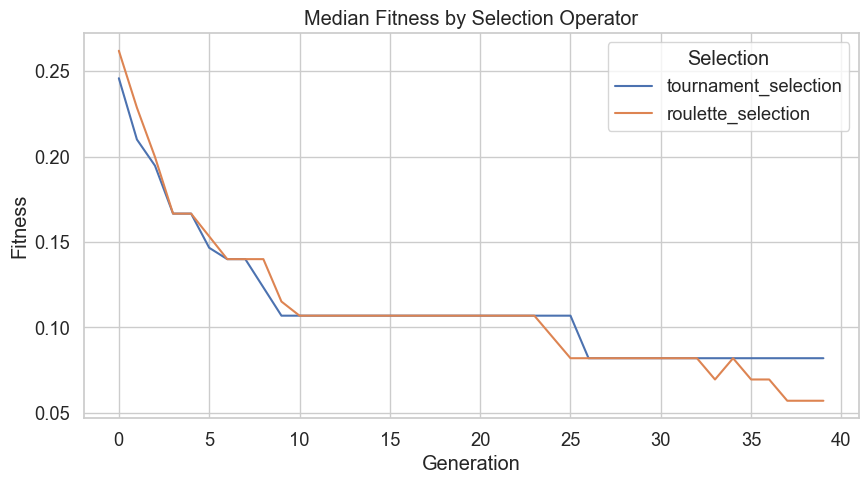

In [21]:
plot_median_fitness_by_operator(fitness_path)


## Statistical tests

#### The Friedman test, checks if there’s any significant difference across all configurations,
#### <br> If there are significant difference then  apply the Nemenyi post-hoc test, which compares each pair of configurations


 Friedman Test (non-parametric ANOVA for repeated measures)

Use when: You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

Assumption: Repeated measurements across same conditions.

Output: Tells you if there is a statistically significant difference somewhere in the group.


### Evaluating statistical significance across full hyperparameter configurations
Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [22]:
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)


Friedman Test Results:
Test Statistic: 373.8070
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


In [23]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False  \
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                                             1.0000                                                                                                         
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             0.9829                                                                                                         
POP=100 XO=0.9 mut_prob=0.1 mutation=single_pla...                                             1.0000                                                                                                         
POP=100 XO=0.9 mut_prob=0.1 mutation=full_posit...                                             0.9606                                    

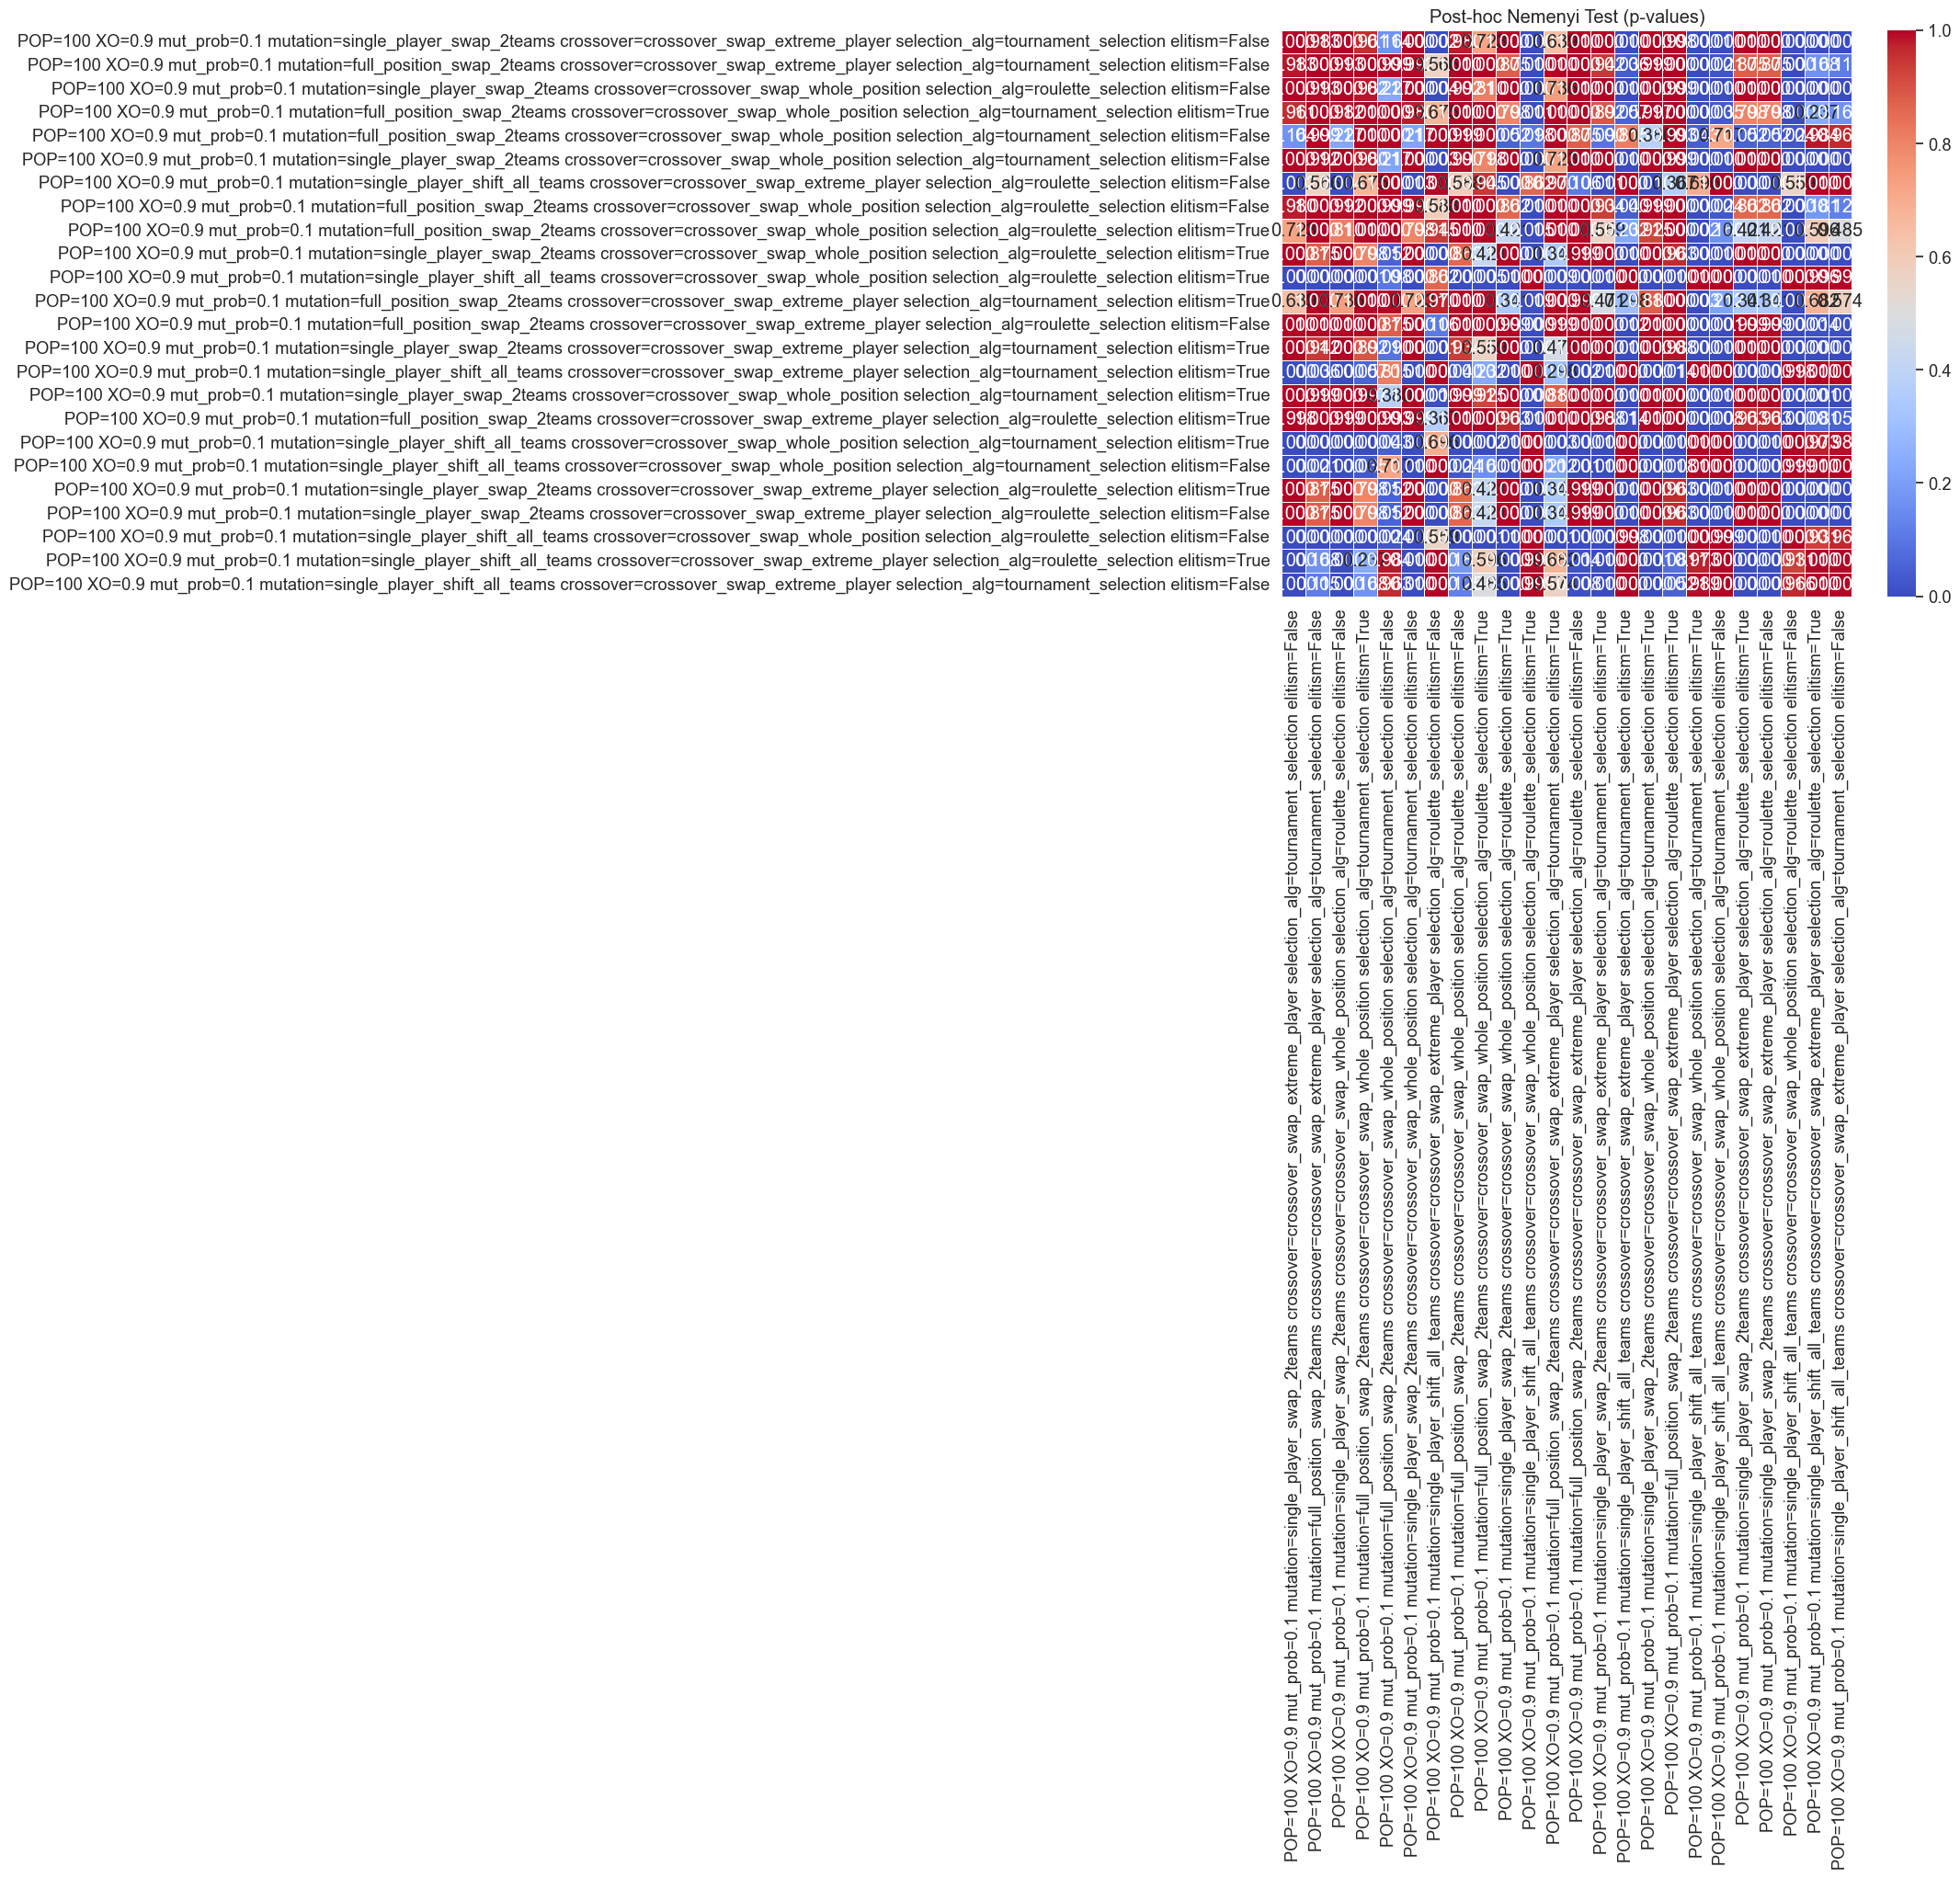

In [24]:
plot_posthoc_heatmap(posthoc_results)

In [25]:
summarize_significant_wins(posthoc_results)

,Significant Wins
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_whole_position selection_alg=roulette_selection elitism=False,16
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=True,16
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_whole_position selection_alg=roulette_selection elitism=True,15
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_whole_position selection_alg=tournament_selection elitism=False,13
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=True,12
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=False,9
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_shift_all_teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,9
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=tournament_selection elitism=True,8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,8
POP=100 XO=0.9 mut_prob=0.1 mutation=single_player_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,8


The table gives a ranking based not just on performance, but on statistical confidence:
<br> Higher "Significant Wins" → more robust evidence that this configuration is truly better across multiple comparisons.
<br> Helps avoid picking a config just because of random variation in performance.

Config 1: It significantly beats 16 other configurations (with p < 0.05 in the Nemenyi test),
This suggests it’s a strong candidate for the best hyperparameter setup.

| POP | XO  | Mut Prob | Mutation                     | Crossover             | Selection Alg         | Elitism | Significant Wins | Interpretation                                                                 |
| --- | --- | -------- | ---------------------------- | --------------------- | --------------------- | ------- | ---------------- | ------------------------------------------------------------------------------ |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | roulette\_selection   | False   | **16**           | Best performer without elitism; shows strong performance without preservation. |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | tournament\_selection | True    | **16**           | Same setup as above but with elitism; equally strong performance.              |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | roulette\_selection   | True    | 15               | Slight drop but still excellent with elitism.                                  |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_whole\_position | tournament\_selection | False   | 13               | Still competitive, though weaker without elitism.                              |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | tournament\_selection | True    | 12               | Performs well with elitism and alternative crossover.                          |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | tournament\_selection | False   | 9                | Slightly weaker without elitism.                                               |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | roulette\_selection   | True    | 9                | Consistent with elitism; crossover still effective.                            |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | tournament\_selection | True    | 8                | Good combo with elitism.                                                       |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | roulette\_selection   | False   | 8                | Solid result even without elitism.                                             |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | roulette\_selection   | True    | 8                | Very robust combo across selection types.                                      |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | tournament\_selection | True    | 8                | Reliable performance with elitism.                                             |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_extreme\_player | tournament\_selection | False   | 8                | Maintains strength across selection methods.                                   |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | roulette\_selection   | True    | 8                | Consistently high performer with elitism.                                      |
| 100 | 0.9 | 0.1      | shift\_all\_teams            | swap\_extreme\_player | roulette\_selection   | False   | 8                | Holds up well without elitism.                                                 |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | tournament\_selection | False   | 8                | Balanced and adaptable combo.                                                  |
| 100 | 0.9 | 0.1      | swap\_2teams                 | swap\_whole\_position | roulette\_selection   | False   | 8                | Good baseline setup.                                                           |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | roulette\_selection   | False   | 7                | Acceptable performance but weaker than swap/shift mutations.                   |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | tournament\_selection | False   | 5                | Drop in performance, especially without elitism.                               |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | roulette\_selection   | True    | 5                | Slight recovery with elitism.                                                  |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | roulette\_selection   | False   | 5                | Fair, but not top-tier performer.                                              |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | tournament\_selection | True    | 4                | Below average despite elitism.                                                 |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_extreme\_player | tournament\_selection | True    | 3                | One of the weakest configurations tested.                                      |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | roulette\_selection   | True    | 3                | Doesn’t benefit much from elitism.                                             |
| 100 | 0.9 | 0.1      | full\_position\_swap\_2teams | swap\_whole\_position | tournament\_selection | False   | 2                | Lowest performing; weak across all settings.                                   |


### Analyzing only the best-performing configurations from ga_summary_gs1.csv

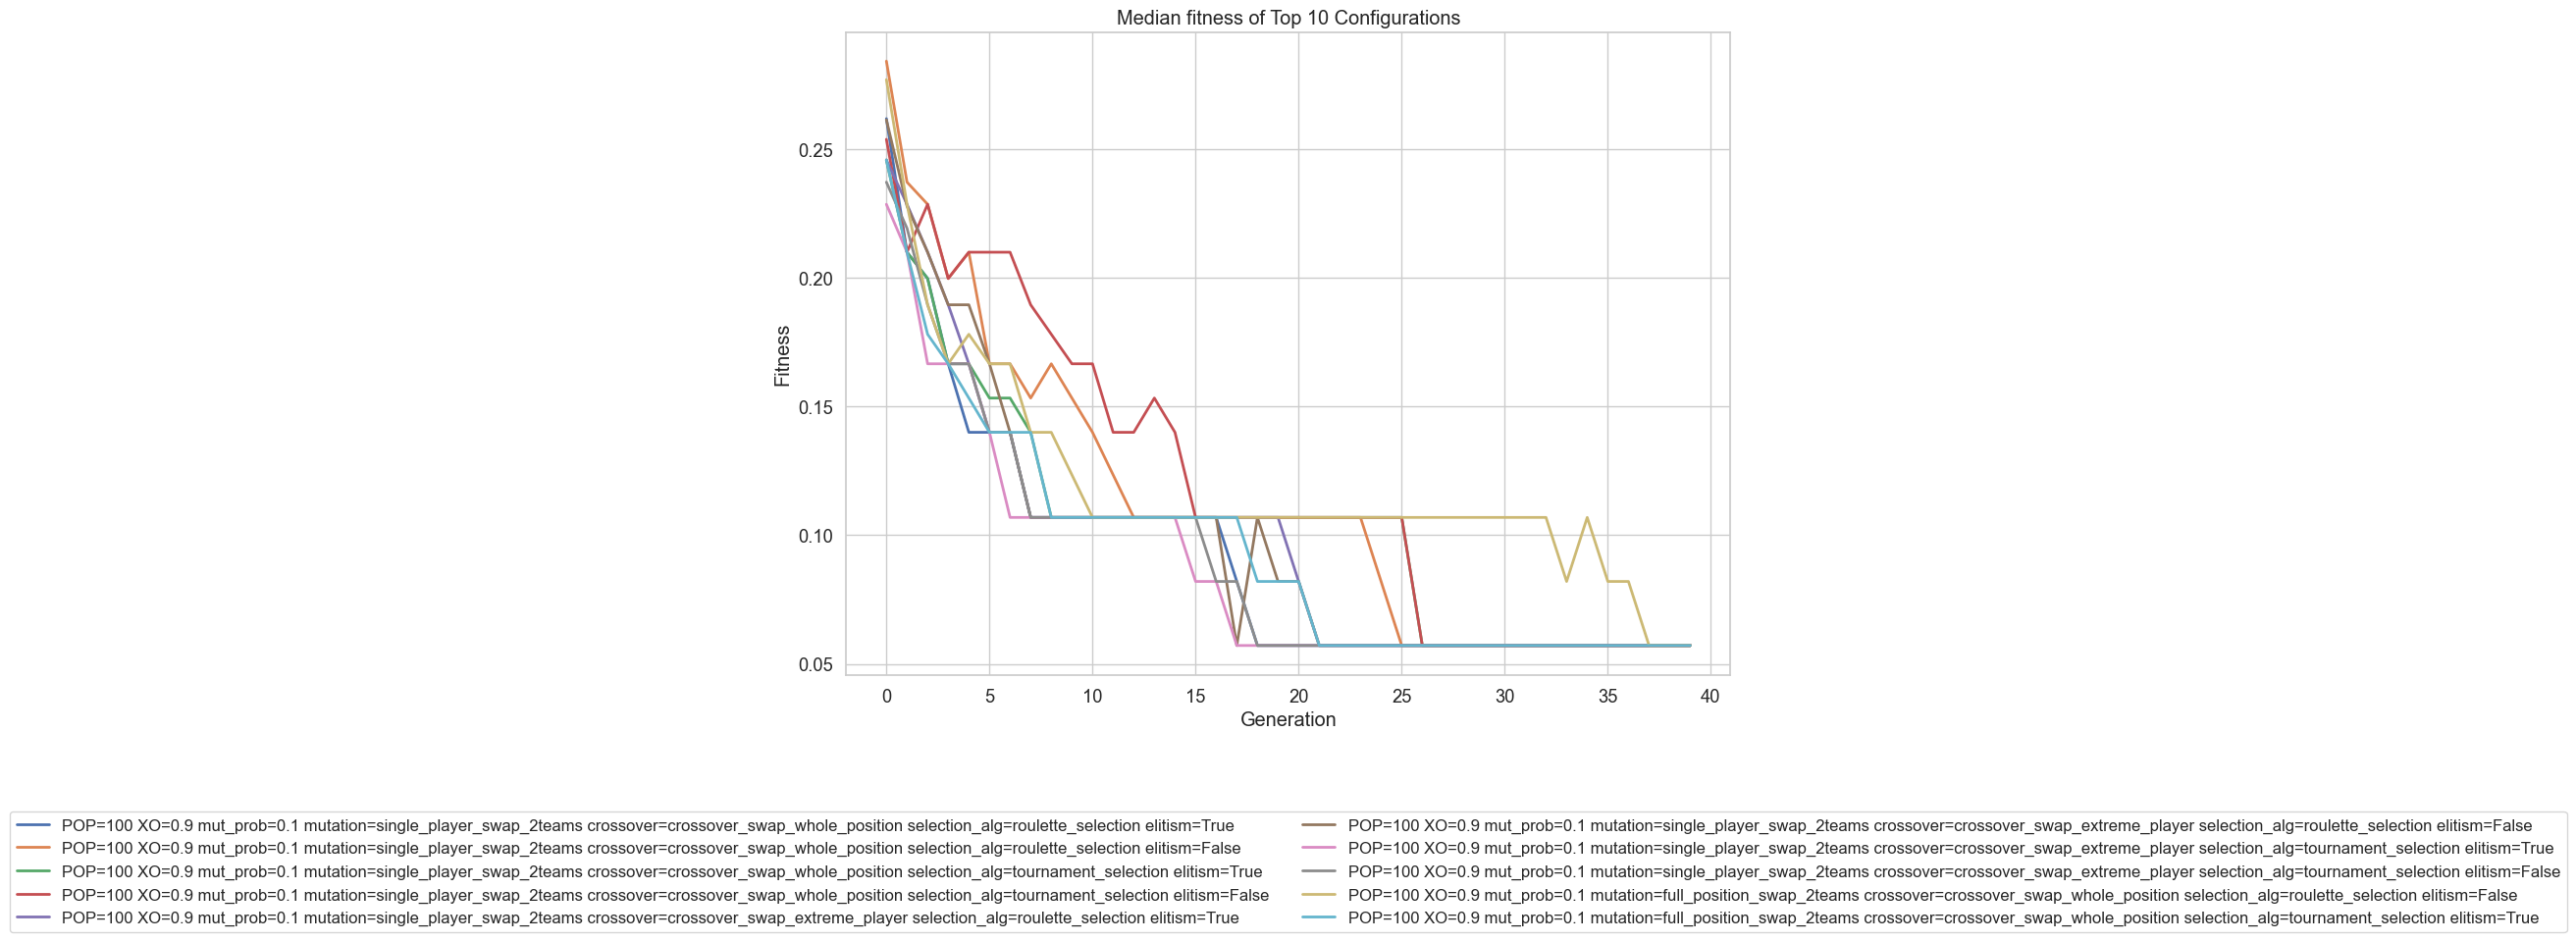

In [26]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=10, metric='median_fitness')

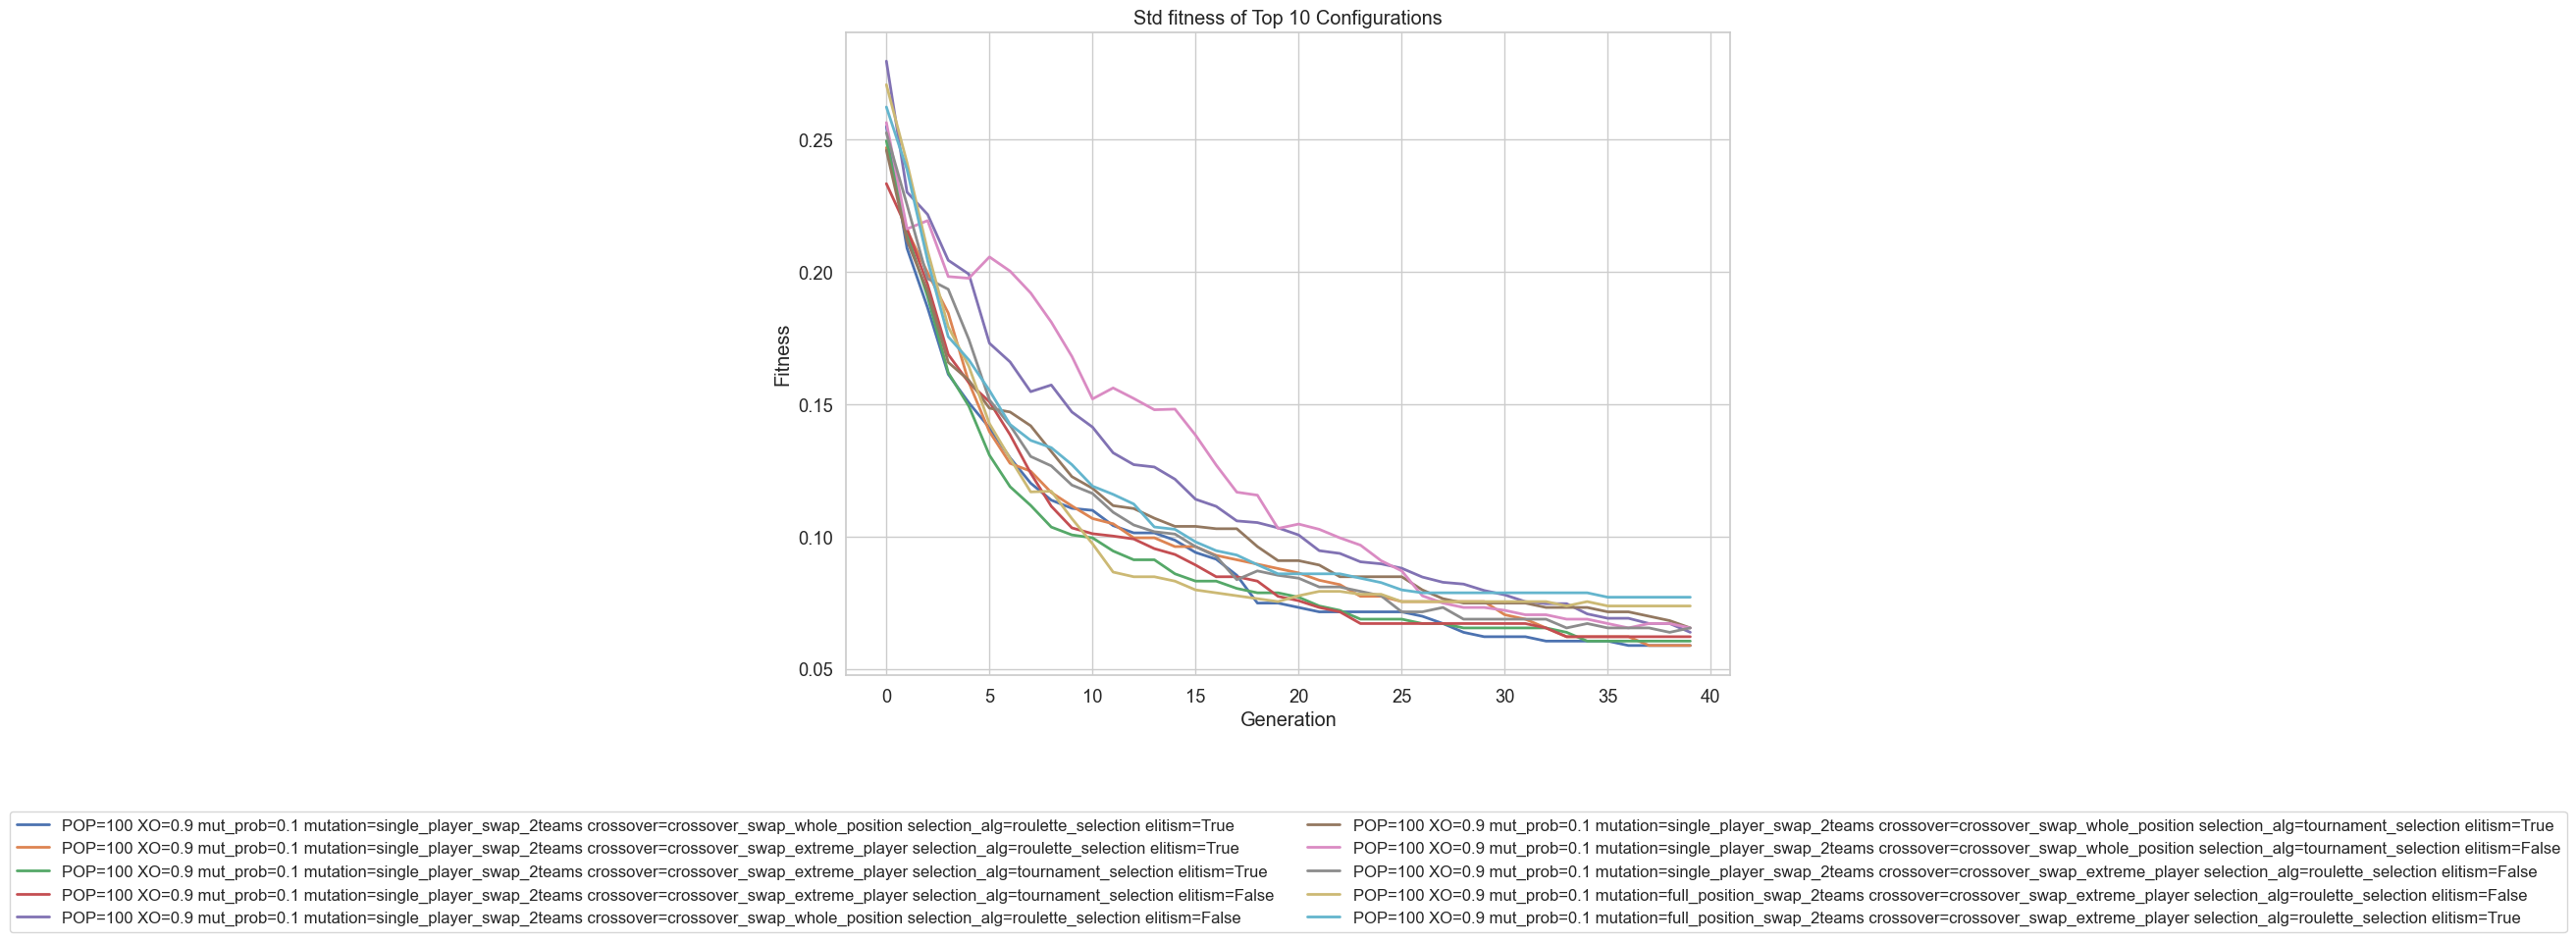

In [27]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=10, metric="std_fitness")

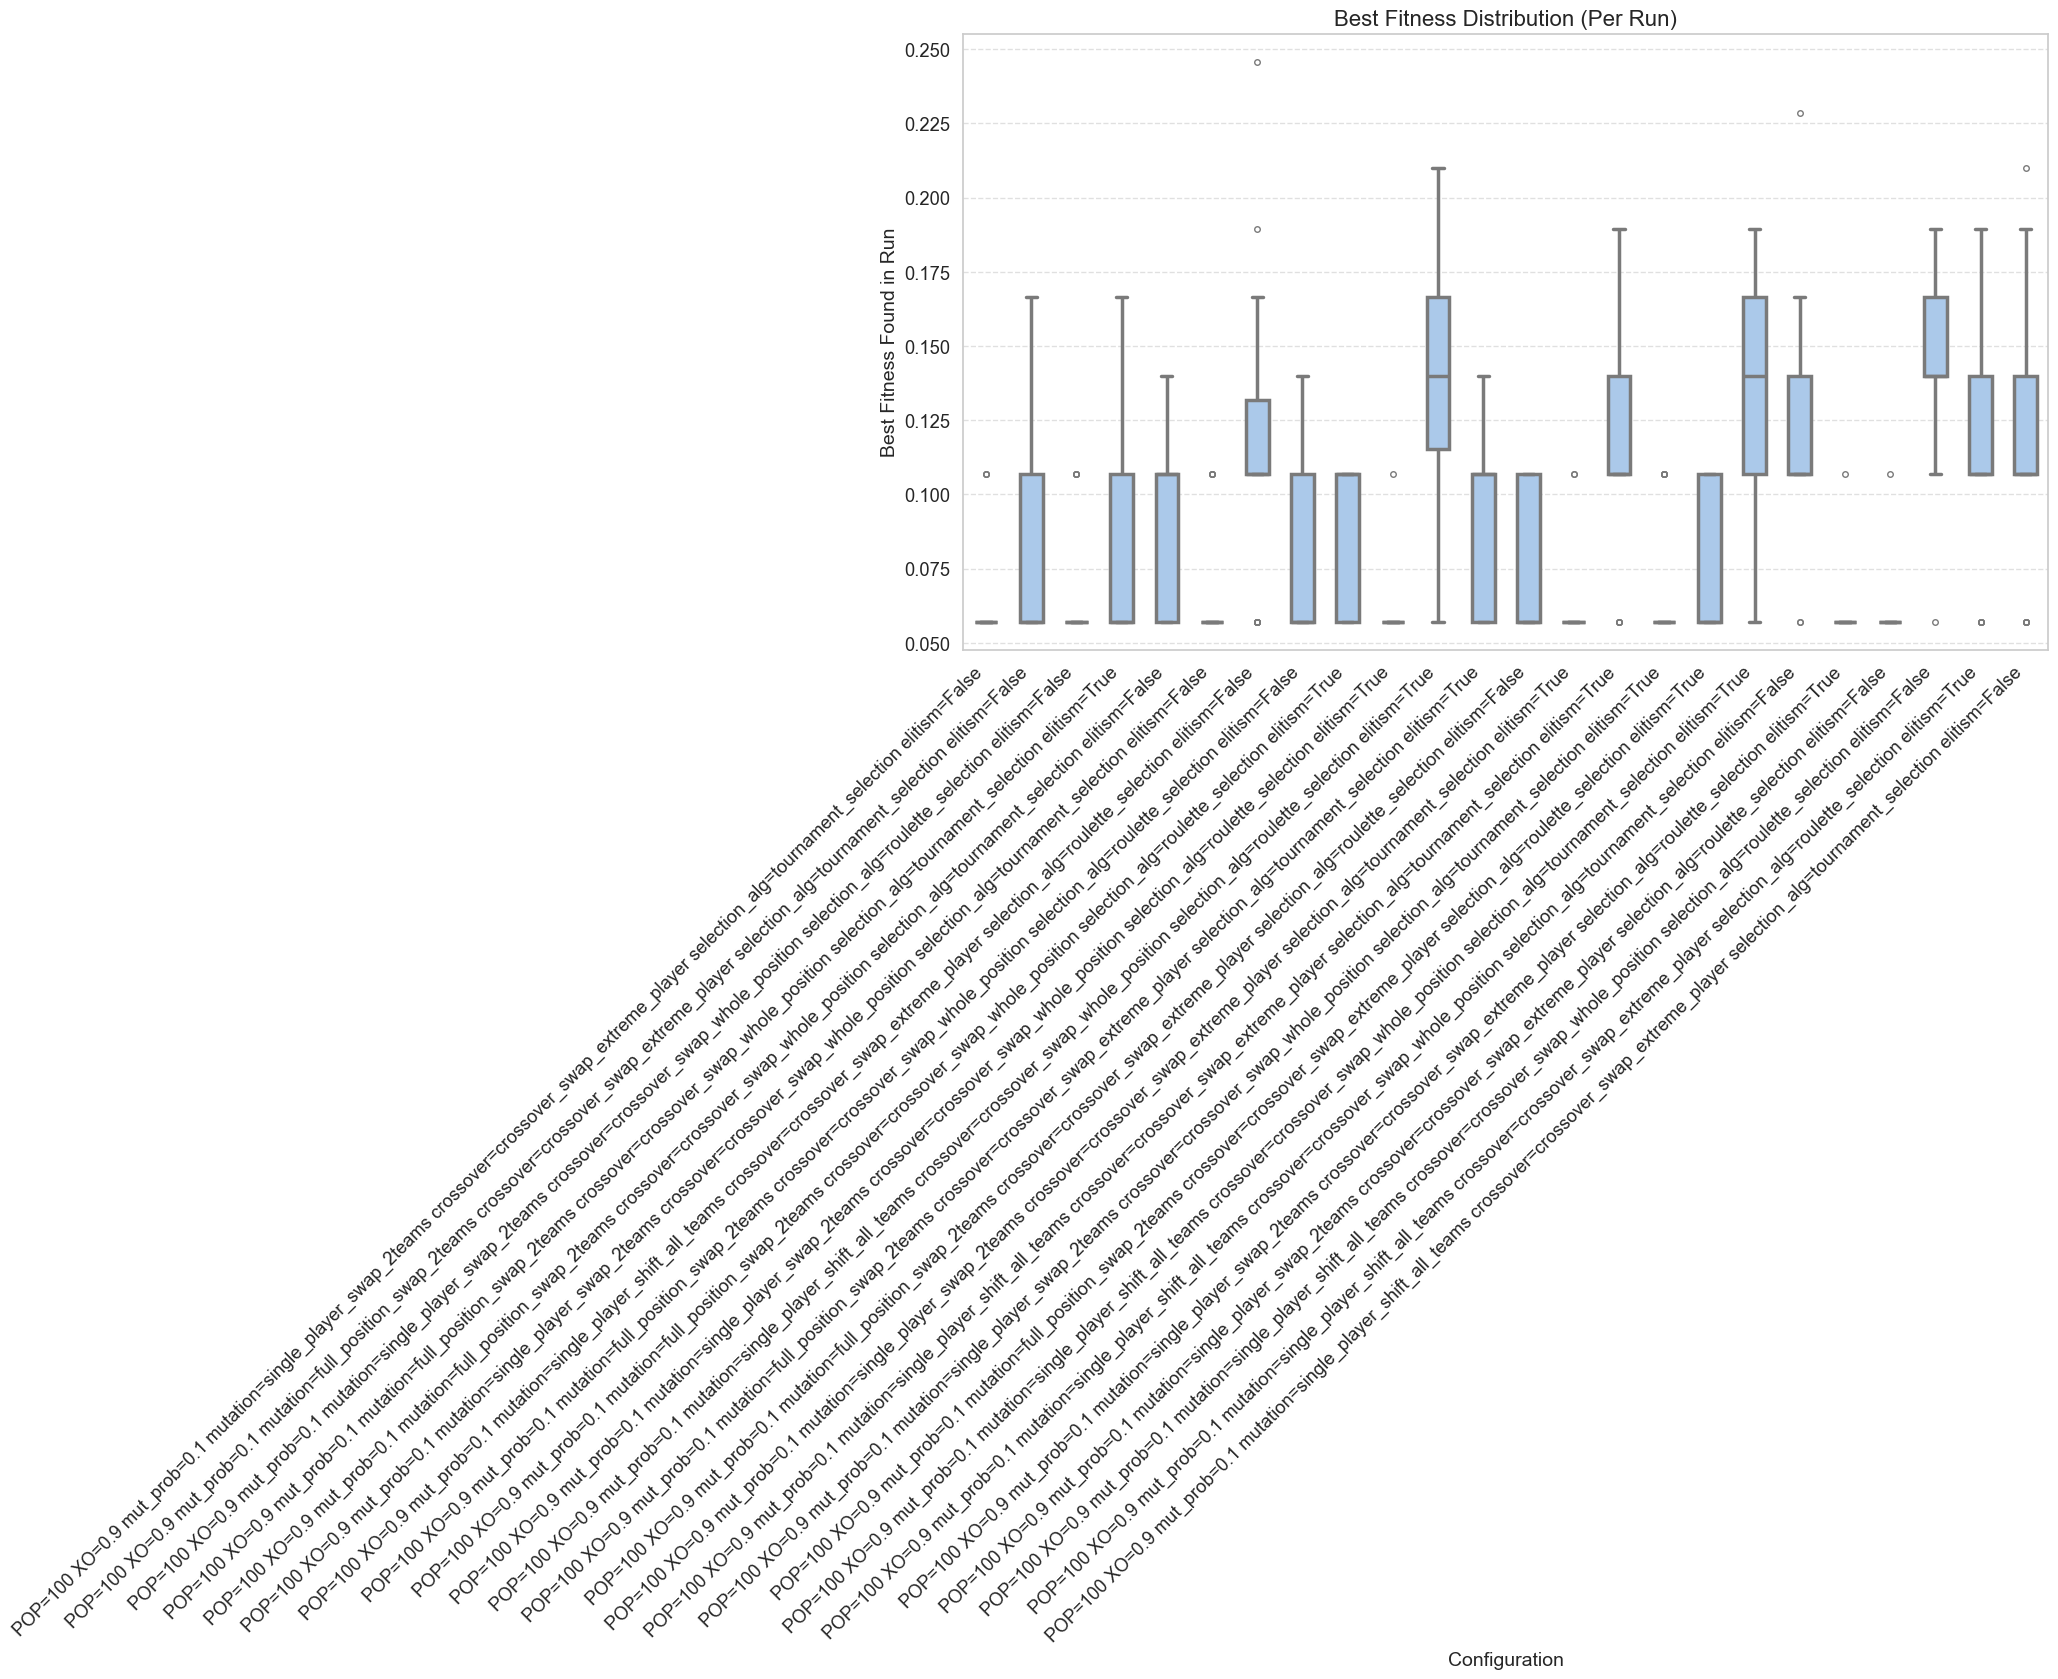

In [28]:
plot_best_fitness_boxplot(fitness_folder=fitness_path, title="Best Fitness Distribution (Per Run)")

Summary of the best mutation, crossover and selection. Based on the metric in the table below we run the grid search2 to check different probabilities. <br> See notebook: evaluations_gs2

| Component     | Pick                            | Reason                                                                     |
| ------------- | ------------------------------- | -------------------------------------------------------------------------- |
| **Mutation**  | `full_position_swap_2teams`     | Best convergence in plot. `single_player_shift_all_teams` stagnates early. |
| **Crossover** | `crossover_swap_extreme_player` | Better final fitness in plot. Slightly better than whole position.         |
| **Selection** | `roulette_selection`            | Slight edge in final fitness + strong post-hoc presence.                   |
| **Elitism**   | `True`                          | Appears in top configs in post-hoc and generally improves convergence.     |
